# Microbiology Object Detection with Edge Detection and Contour Detection

In [52]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

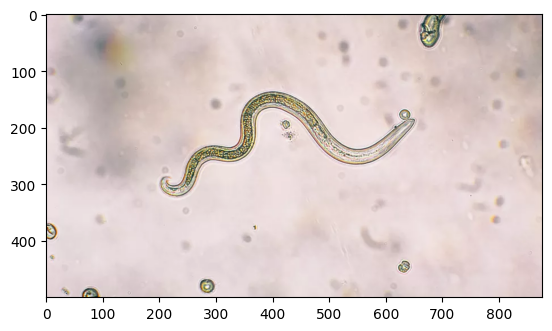

In [53]:
# Import sample image
image = cv2.imread('./sample/a285f437a361444eb64ac31288334928.jpg.webp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image)

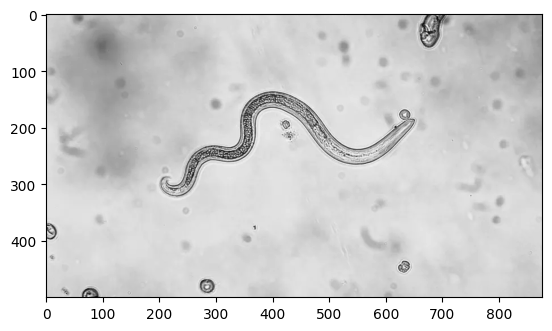

In [54]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Display grayscale image
plt.imshow(gray, cmap='gray')

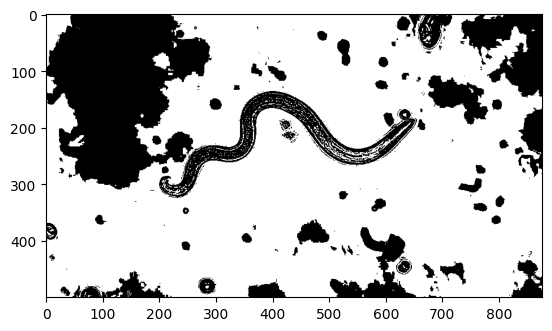

In [55]:
# Define adaptive thresholding parameters
block_size = 513
constant = 2

# Apply adaptive thresholding
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)

# Display binary image
plt.imshow(binary, cmap='gray')

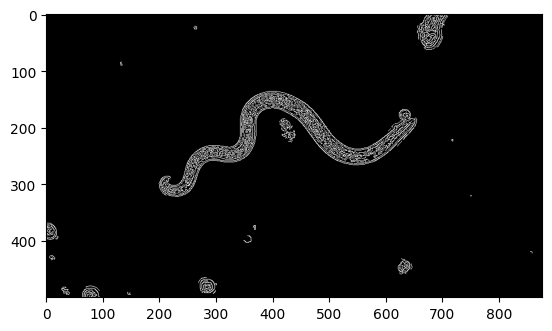

In [56]:
# Edge detection
edges = cv2.Canny(gray, 100, 200)

# Display edges
plt.imshow(edges, cmap='gray')

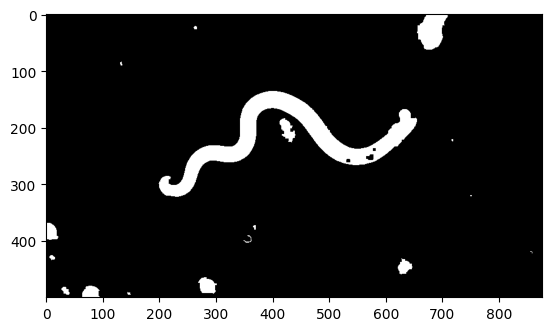

In [57]:
# Fill holes
filled = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))

# Display filled image
plt.imshow(filled, cmap='gray')

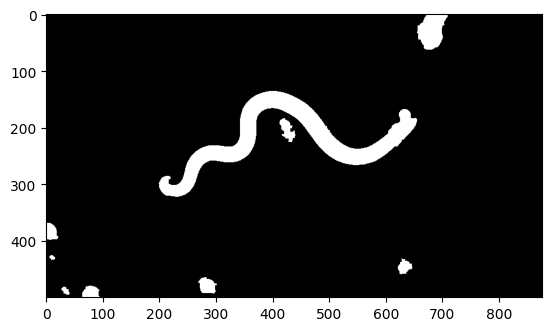

In [58]:
# Remove small objects
contours, _ = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter small objects
filtered = np.zeros_like(filled)
for contour in contours:
    if cv2.contourArea(contour) > 30:
        cv2.drawContours(filtered, [contour], -1, 255, -1)

# Display filtered image
plt.imshow(filtered, cmap='gray')

In [59]:
# Obtain contours
contours, _ = cv2.findContours(filtered, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

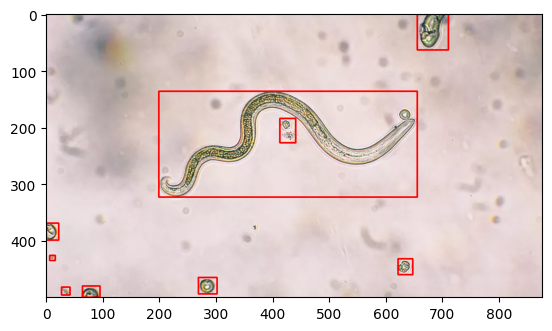

In [60]:
# Find bounding boxes
bounding_boxes = [cv2.boundingRect(contour) for contour in contours]

# Draw bounding boxes
for x, y, w, h in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display image with bounding boxes
plt.imshow(image)